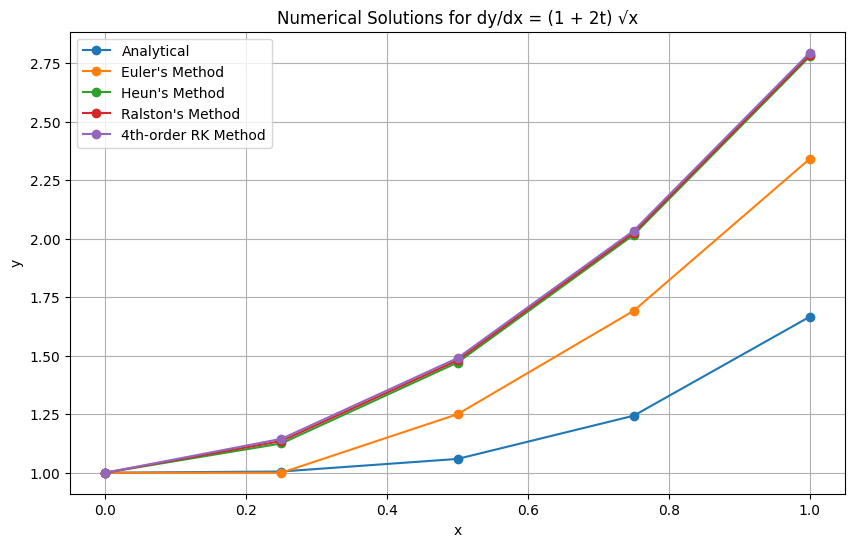

In [ ]:
# Codes created by Nguyen Minh Duc - ITITIU21045 - TMCLab9
import numpy as np
import matplotlib.pyplot as plt

# Given ODE
def f(t, y, x):
    return (1 + 2*t) * np.sqrt(x)

# (a) Analytical solution (if possible)
def analytical_solution(t, x):
    return (2/3) * (x**(3/2)) * (t**2) + 1

# (b) Euler's method
def euler_method(t_values, h):
    y_values = [1]  # Initial condition
    for i in range(1, len(t_values)):
        x_i = t_values[i-1]
        t_i = t_values[i]
        y_i = y_values[-1]
        y_next = y_i + h * f(t_i, y_i, x_i)
        y_values.append(y_next)
    return y_values

# (c) Heun's method without iteration
def heun_method(t_values, h):
    y_values = [1]  # Initial condition
    for i in range(1, len(t_values)):
        x_i = t_values[i-1]
        t_i = t_values[i]
        y_i = y_values[-1]
        k1 = f(t_i, y_i, x_i)
        k2 = f(t_i + h, y_i + h * k1, x_i + h)
        y_next = y_i + 0.5 * h * (k1 + k2)
        y_values.append(y_next)
    return y_values

# (d) Ralston's method
def ralston_method(t_values, h):
    y_values = [1]  # Initial condition
    for i in range(1, len(t_values)):
        x_i = t_values[i-1]
        t_i = t_values[i]
        y_i = y_values[-1]
        k1 = f(t_i, y_i, x_i)
        k2 = f(t_i + 0.75 * h, y_i + 0.75 * h * k1, x_i + 0.75 * h)
        y_next = y_i + (1/3) * h * (k1 + 2*k2)
        y_values.append(y_next)
    return y_values

# (e) Fourth-order Runge-Kutta (RK) method
def runge_kutta_method(t_values, h):
    y_values = [1]  # Initial condition
    for i in range(1, len(t_values)):
        x_i = t_values[i-1]
        t_i = t_values[i]
        y_i = y_values[-1]
        k1 = f(t_i, y_i, x_i)
        k2 = f(t_i + 0.5 * h, y_i + 0.5 * h * k1, x_i + 0.5 * h)
        k3 = f(t_i + 0.5 * h, y_i + 0.5 * h * k2, x_i + 0.5 * h)
        k4 = f(t_i + h, y_i + h * k3, x_i + h)
        y_next = y_i + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
        y_values.append(y_next)
    return y_values

# Interval and step size
t_values = np.arange(0, 1.25, 0.25)

# Analytical solution
analytical_values = analytical_solution(t_values, t_values)

# Numerical solutions
euler_values = euler_method(t_values, 0.25)
heun_values = heun_method(t_values, 0.25)
ralston_values = ralston_method(t_values, 0.25)
rk_values = runge_kutta_method(t_values, 0.25)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t_values, analytical_values, label='Analytical', marker='o')
plt.plot(t_values, euler_values, label="Euler's Method", marker='o')
plt.plot(t_values, heun_values, label="Heun's Method", marker='o')
plt.plot(t_values, ralston_values, label="Ralston's Method", marker='o')
plt.plot(t_values, rk_values, label='4th-order RK Method', marker='o')

plt.title('Numerical Solutions for dy/dx = (1 + 2t) √x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
